<a href="https://colab.research.google.com/github/Xfinity-bot/ML-Notebooks/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data[:,2:]

In [6]:
import numpy as np
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)


In [8]:
 pca.explained_variance_ratio_


array([0.99025066, 0.00974934])

In [10]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


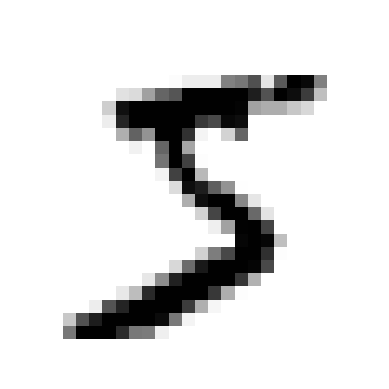

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()
x,y =mnist["data"],mnist["target"]
x.shape
import matplotlib as mpl
import matplotlib.pyplot as plt


some_d =x.to_numpy()[0]
some_d_img = some_d.reshape(28,28)
plt.imshow(some_d_img,cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
y=y.astype(np.uint8)

In [16]:
x_train,x_test,y_train,y_test =x[:60000],x[60000:],y[:60000],y[60000:]

In [17]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [19]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)

In [20]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(x_train)
X_recovered = pca.inverse_transform(X_reduced)

**Compressed Image**

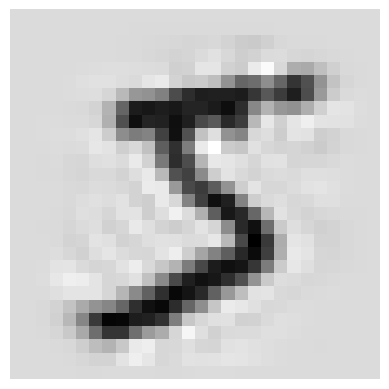

In [22]:
some_d =X_recovered[0]
some_d_img = some_d.reshape(28,28)
plt.imshow(some_d_img,cmap='binary')
plt.axis("off")
plt.show()